In [8]:
import pandas as pd
from mylib.lib import (
    readData,
    cleanData,
    summaryStatistics,
    PiePlot,
    tripleBarPlot,
)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [9]:
Data = "FT Global Business School MBA Ranking 2024.csv"
ColumnsWantedForSummaryStats = ["Value for money rank", "Salary percentage increase", "Overall satisfaction **"]
ColumnsForDataset = ["#", "School Name", "International students (%)", "International faculty (%)",  "Value for money rank", "Career progress rank", "Careers service rank"]
Rank = "#"  # Column for sorting
SchoolName = "School Name"
requiredrank = 10
PctIntlStudents = "International students (%)"
PctIntlFaculty = "International faculty (%)"
RankNames = "Value for money rank", "Career progress rank", "Careers service rank"
university_column = 'School Name'



In [10]:
Dataset = readData(Data)
SummaryStatistics = summaryStatistics(Dataset, ColumnsWantedForSummaryStats)
display(SummaryStatistics)

,Value for money rank,Salary percentage increase,Overall satisfaction **
index,,,
count,100.000000,100.000000,100.000000
mean,50.500000,117.960000,8.875580
std,29.011492,34.675675,0.491156
min,1.000000,40.000000,7.655000
25%,25.750000,89.000000,8.602500
50%,50.500000,121.500000,8.964000
75%,75.250000,139.000000,9.198500
max,100.000000,229.000000,9.975000
median,50.500000,121.500000,8.964000


In [11]:
CleanData = cleanData(Dataset, Rank, ColumnsForDataset, requiredrank)

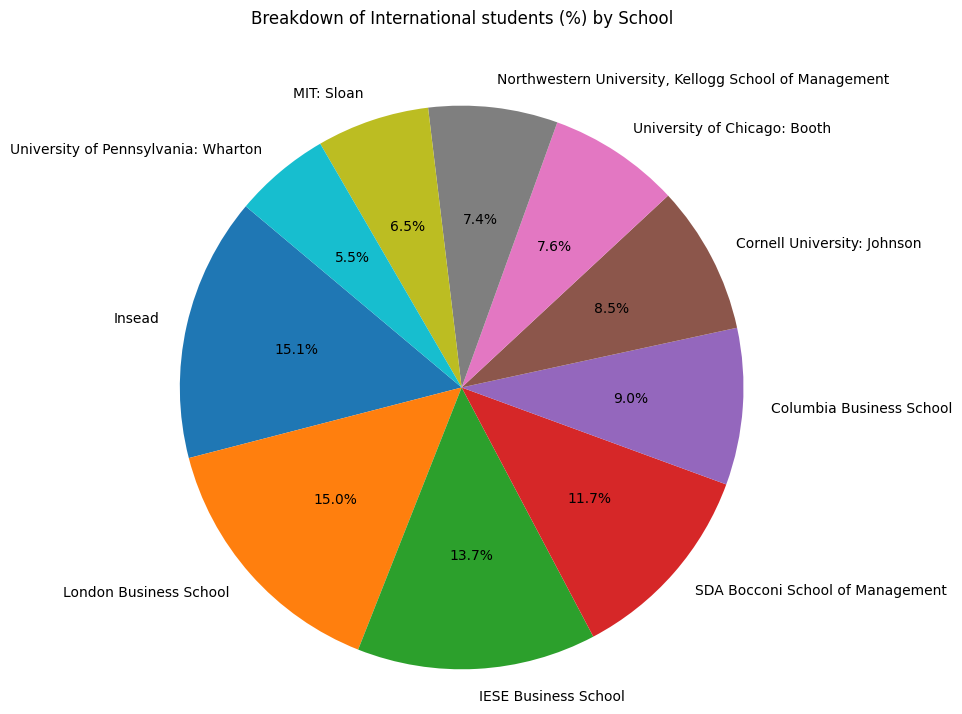

In [12]:
piePlotStudents = PiePlot(CleanData, PctIntlStudents, SchoolName)

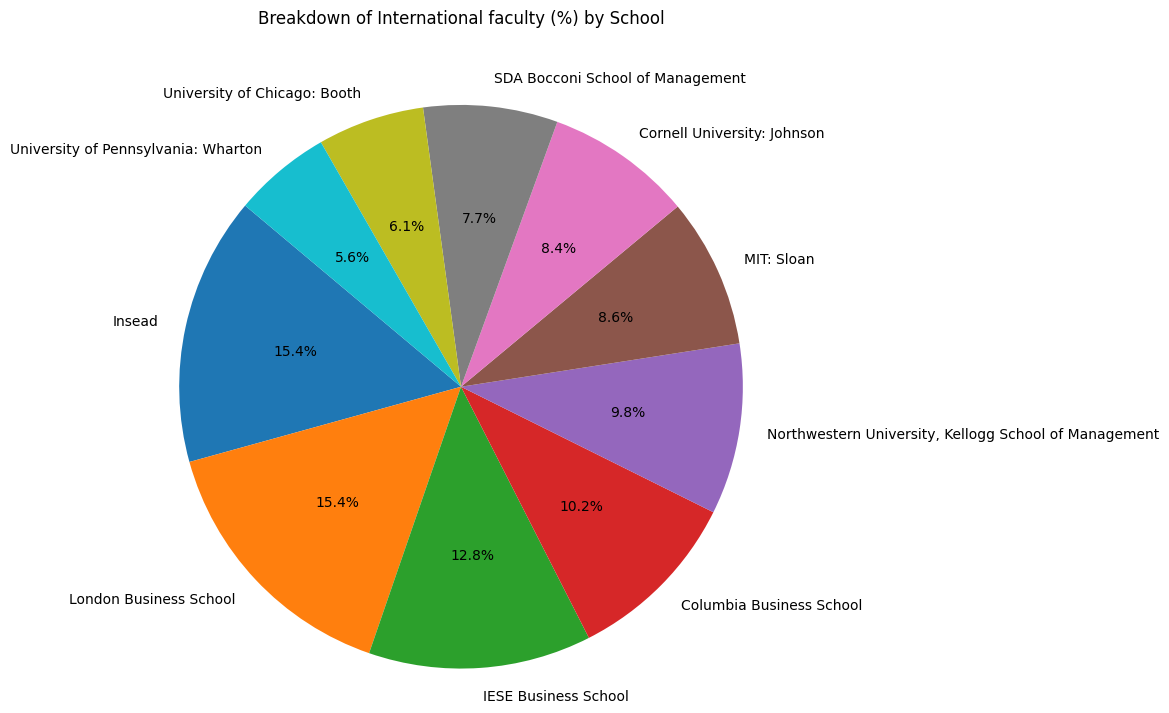

In [13]:
piePlotFaculty = PiePlot(CleanData, PctIntlFaculty, SchoolName)

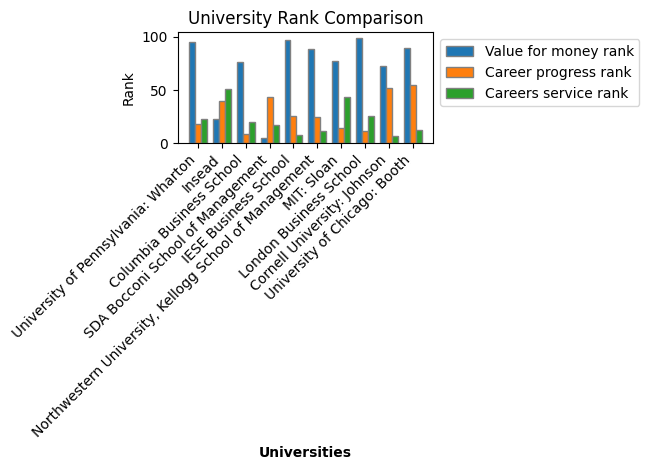

In [14]:
BarChart = tripleBarPlot(CleanData, SchoolName, RankNames)